In [ ]:
#Main loop

In [ ]:
#Import the dataset
#Train
#Validation
#Test

In [ ]:
'''
1) Compute the heatmap

2) Compute annotation embedding

3) Feed the heatmap and annotation embedding to the model

4) Get a bounding box as output

5) Compute the loss 
'''

In [ ]:
#Loss function
#Intersection over union

'''
A boundig box is defined as a tuple of 4 values (x, y, w, h)

where x and y are the coordinates of the bottom left corner of the bounding box
w and h are the width and height of the bounding box

'''
def bb_intersection_over_union(boxA, boxB):
	# Determine the bottom left corner of the intersection
    intersection_bottom_left_x = max(boxA[0], boxB[0])
    intersection_bottom_left_y = max(boxA[1], boxB[1])
    # Determine the top right corner of the intersection
    intersection_top_right_x = min(boxA[0] + boxA[2], boxB[0] + boxB[2])
    intersection_top_right_y = min(boxA[1] + boxA[3], boxB[1] + boxB[3])
    # Check if the boxes intersect
    if(intersection_bottom_left_x >= intersection_bottom_left_x or intersection_bottom_left_y >= intersection_top_right_y):
        return 0
    # Compute the area of intersection, and the area of the original boxes
    intersection_area = (intersection_top_right_x - intersection_bottom_left_x) * (intersection_top_right_y - intersection_bottom_left_y)
    boxA_area = boxA[2] * boxA[3]
    boxB_area = boxB[2] * boxB[3]
    # Compute the union area by adding the area of the two boxes and subtracting the area of intersection
    union_area = boxA_area + boxB_area - intersection_area
    iou = intersection_area / float(union_area)
	# return the intersection over union value
    return iou

In [13]:
# -- coding: utf-8 --
"""
Created on Thu Apr 20 10:24:49 2023

@author: Mateo-drr
"""

import os
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torchvision.transforms as tt
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
import pickle
import copy
from matplotlib.patches import Rectangle
import clip
torch.backends.cudnn.benchmark = True 
torch.set_num_threads(4)


#Bounding box data is bottom left x,y top right x,y 

path = '/Volumes/diskHP/Nicola/dataset/picklesL/'
n_epochs = 25
init_lr = 0.0009
clipping_value = 1 #gradient clip
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(device)
criterion = nn.MSELoss()
save_freq =1
batch_size = 128
resize_value = 640
resize = True

def loadData(path,split):
    files =  os.listdir(path + split)
    dataset = []
    for file in files:
        file_path = os.path.join(path+split, file)
        
        dataset.append(file_path)
    return dataset
     

class CustomDataset(Dataset):

    def __init__(self, data):
    #WHAT DO WE PUT HERE?
        self.data = data

    def __len__(self):
    #JUST THE LENGTH OF THE DATASET
        return len(self.data)

    def __getitem__(self, idx):
    #TAKE ONE ITEM FROM THE DATASET
    
        
        with open(self.data[idx], 'rb') as file:             
            data = pickle.load(file)
            if True:#data['img']['mode'] == 'RGB': TODO   
                label = [data['label']['sentences'][0]['raw']] #take the first label raw
                annotation = data['annotation']['bbox']
                img = Image.frombytes(data['img']['mode'],
                                      data['img']['size'],
                                      data['img']['pixels'])
                
                img = np.transpose(np.array(img, dtype=np.float32)/255)
                if img.shape[0] != 3:
                    img = np.repeat(img[np.newaxis, :,:],3,axis=0)
                img = torch.tensor(img)
                #Check if the image is horizontal or vertical
                if(img.shape[1] > img.shape[2]):
                    orientation = 'h'
                else:
                    orientation = 'v'

                if(resize):
                    transform = tt.Resize((resize_value,resize_value), interpolation=tt.InterpolationMode.BICUBIC, antialias=True)
                    img = transform(img)
                #img = F.Resize(img, 224,interpolation=tt.InterpolationMode.BICUBIC)
                rsize = [data['img']['size'][0]/img.size()[1],
                         data['img']['size'][1]/img.size()[2]]
                bbox = [annotation[0]/rsize[0], annotation[1]/rsize[1],
                        annotation[2]/rsize[0], annotation[3]/rsize[1]]
        #decode = self.tokenizer.convert_ids_to_tokens(encoding_text['input_ids'].flatten())

        return {'img':img,
              'label':label,
              'bbox':torch.tensor(bbox),
              'orientation:': orientation}

#CREATE THE DATALOADER
def create_data_loader_CustomDataset(data, batch_size, eval=False):
    ds = CustomDataset(data=data)

    if not eval:
        return DataLoader(ds, batch_size=batch_size, shuffle=True), len(ds)

    else:
        return DataLoader(ds, batch_size=batch_size, shuffle=False), len(ds)

train_ds = loadData(path, 'train/')
val_ds = loadData(path, 'val/')
print(val_ds)
test_ds = loadData(path, 'test/')

#train_dl, train_length = create_data_loader_CustomDataset(train_ds, batch_size, eval=False)
#val_dl, train_length = create_data_loader_CustomDataset(val_ds, batch_size, eval=True)
#test_dl, train_length = create_data_loader_CustomDataset(test_ds, batch_size, eval=True)


#yoloM = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True, trust_repo='check') #ans yes
#yoloM.to(device)
#clipM, preprocess = clip.load("RN50", device='cuda')


cpu
['/Volumes/diskHP/Nicola/dataset/picklesL/val/COCO_val2014_000000000309.p', '/Volumes/diskHP/Nicola/dataset/picklesL/val/COCO_val2014_000000000795.p', '/Volumes/diskHP/Nicola/dataset/picklesL/val/COCO_val2014_000000001261.p', '/Volumes/diskHP/Nicola/dataset/picklesL/val/COCO_val2014_000000001407.p', '/Volumes/diskHP/Nicola/dataset/picklesL/val/COCO_val2014_000000001994.p', '/Volumes/diskHP/Nicola/dataset/picklesL/val/COCO_val2014_000000002411.p', '/Volumes/diskHP/Nicola/dataset/picklesL/val/COCO_val2014_000000002892.p', '/Volumes/diskHP/Nicola/dataset/picklesL/val/COCO_val2014_000000003178.p', '/Volumes/diskHP/Nicola/dataset/picklesL/val/COCO_val2014_000000003320.p', '/Volumes/diskHP/Nicola/dataset/picklesL/val/COCO_val2014_000000004477.p', '/Volumes/diskHP/Nicola/dataset/picklesL/val/COCO_val2014_000000004830.p', '/Volumes/diskHP/Nicola/dataset/picklesL/val/COCO_val2014_000000005587.p', '/Volumes/diskHP/Nicola/dataset/picklesL/val/COCO_val2014_000000005862.p', '/Volumes/diskHP/Nic

In [14]:
batch_size = 8

train_dl, train_length = create_data_loader_CustomDataset(train_ds, batch_size, eval=False)
val_dl, train_length = create_data_loader_CustomDataset(val_ds, batch_size, eval=True)
test_dl, train_length = create_data_loader_CustomDataset(test_ds, batch_size, eval=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 640, 640])
77.97333526611328 251.01866149902344 129.51466369628906 275.2213439941406


/var/folders/l8/hdp9mfm55nq2xqyctskbfdvr0000gn/T/ipykernel_1358/1920988229.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((x_down, y_down), w, h, linewidth=1, edgecolor='r', facecolor='none',alpha=0.3,color='r')


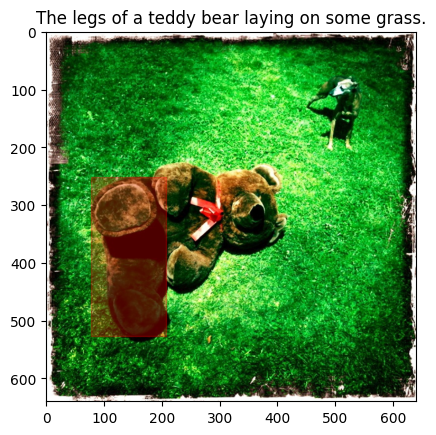

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 640, 640])
100.27519989013672 235.87469482421875 247.3343963623047 277.5710754394531


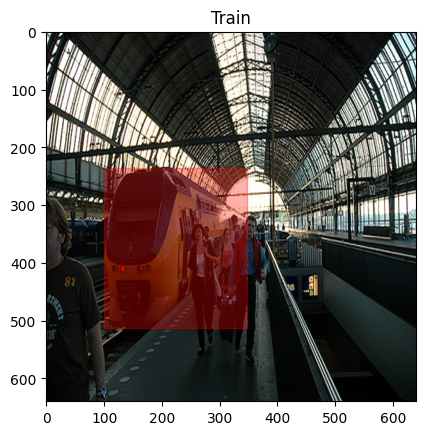

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 640, 640])
278.2900085449219 133.32000732421875 361.7099914550781 445.8399963378906


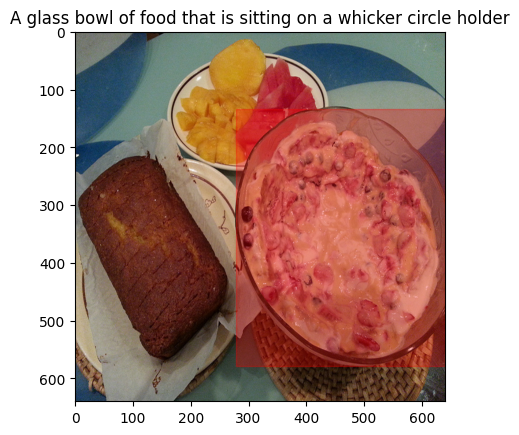

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 640, 640])
184.95701599121094 4.070000171661377 176.3439178466797 138.07000732421875


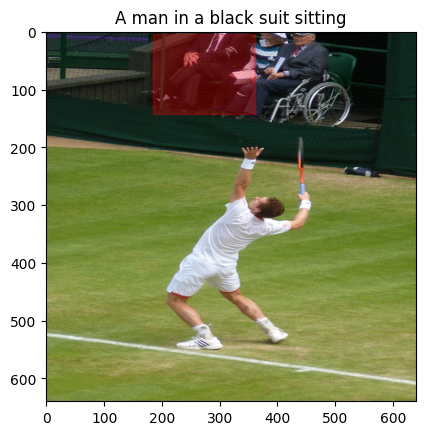

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 640, 640])
577.2999877929688 0.0 62.70000076293945 640.0


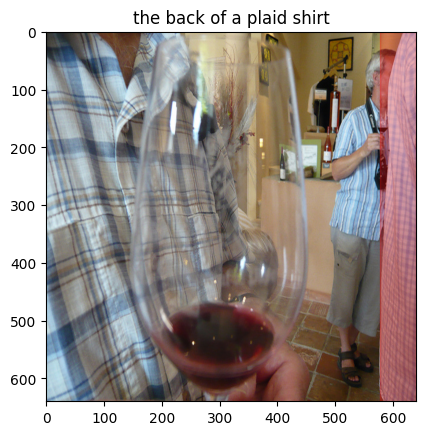

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 640, 640])
23.579999923706055 177.94142150878906 160.75999450683594 324.29791259765625


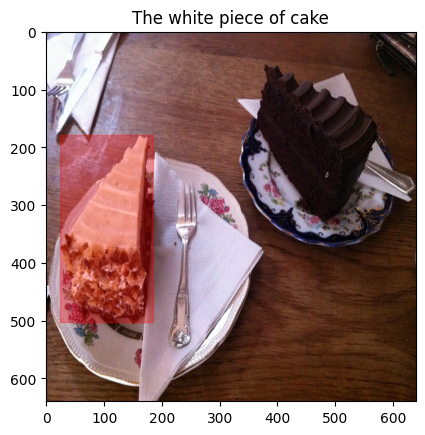

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 640, 640])
0.9599999785423279 0.7211267352104187 459.5799865722656 632.7887573242188


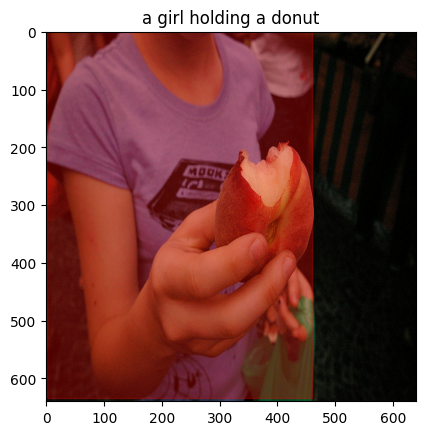

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 640, 640])
412.5899963378906 41.7950325012207 175.57000732421875 496.84515380859375


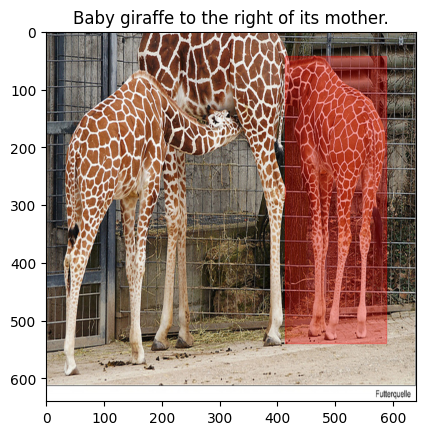

torch.Size([8, 3, 640, 640])
[('The legs of a teddy bear laying on some grass.', 'Train', 'A glass bowl of food that is sitting on a whicker circle holder', 'A man in a black suit sitting', 'the back of a plaid shirt', 'The white piece of cake', 'a girl holding a donut', 'Baby giraffe to the right of its mother.')]
tensor([[ 77.9733, 251.0187, 129.5147, 275.2213],
        [100.2752, 235.8747, 247.3344, 277.5711],
        [278.2900, 133.3200, 361.7100, 445.8400],
        [184.9570,   4.0700, 176.3439, 138.0700],
        [577.3000,   0.0000,  62.7000, 640.0000],
        [ 23.5800, 177.9414, 160.7600, 324.2979],
        [  0.9600,   0.7211, 459.5800, 632.7888],
        [412.5900,  41.7950, 175.5700, 496.8452]])


In [37]:
import matplotlib.patches as patches
for batch in val_dl:
    for i,image in enumerate(batch['img']):
        print(image.shape)
        image = image.permute(2,1,0)
        fig, ax = plt.subplots()

        ax.imshow(image)
        plt.title(batch['label'][0][i])
        x_down = batch['bbox'][i][0].item()
        y_down = batch['bbox'][i][1].item()
        w = batch['bbox'][i][2].item()
        h = batch['bbox'][i][3].item()
        print(x_down,y_down,w,h)
        rect = plt.Rectangle((x_down, y_down), w, h, linewidth=1, edgecolor='r', facecolor='none',alpha=0.3,color='r')
        ax.add_patch(rect)
        plt.show()
        
    print(batch['img'].shape)
    #plt.imshow(item['img'])
    print(batch['label'])
    print(batch['bbox'])
    break

In [38]:
device = 'cpu'

from torchvision import transforms
toTensor = transforms.ToTensor()

In [74]:
import clip
import numpy as np

model, preprocess = clip.load("RN50")
model.to(device).eval()
input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

Model parameters: 102,007,137
Input resolution: 224
Context length: 77
Vocab size: 49408


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


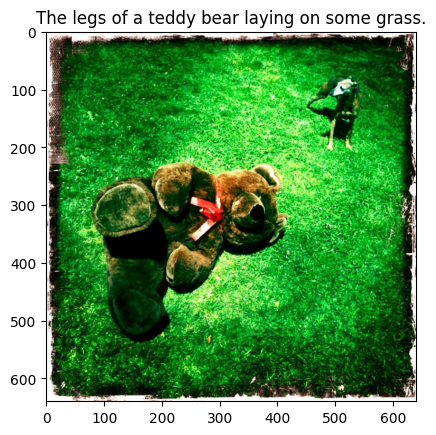

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[49406,   518,  7072,   539,   320, 11798,  4298, 12333,   525,   836,
          5922,   269, 49407,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0]], dtype=torch.int32)


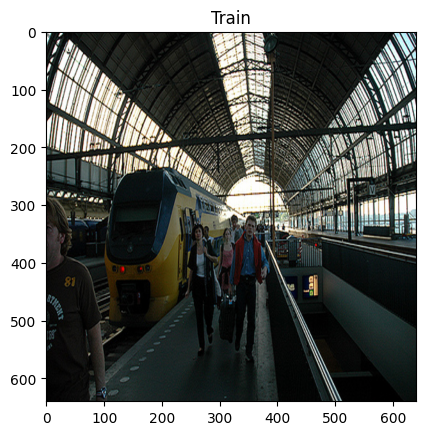

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[49406,  3231, 49407,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0]], dtype=torch.int32)


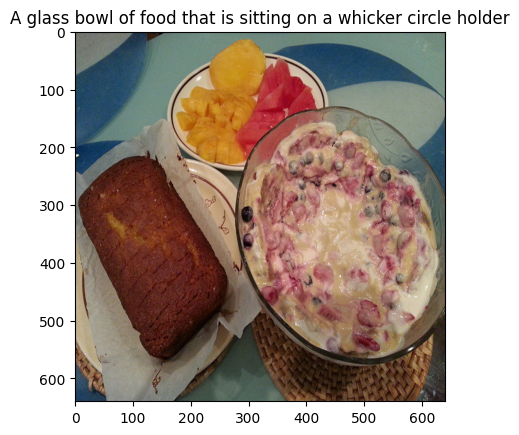

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[49406,   320,  3313,  3814,   539,  1559,   682,   533,  4919,   525,
           320,   573, 40357,  7117,  7862, 49407,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0]], dtype=torch.int32)


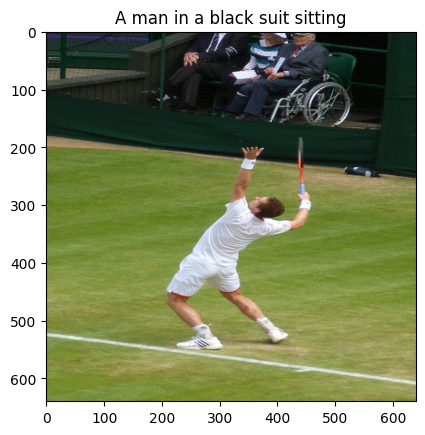

tensor([[49406,   320,   786,   530,   320,  1449,  3940,  4919, 49407,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0]], dtype=torch.int32)


In [111]:
for batch in val_dl:
    for i,image in enumerate(batch['img']):
        image = image.to(device)
        plotted_image = image.permute(2,1,0)
        
        fig, ax = plt.subplots()
        ax.imshow(plotted_image)
        plt.title(batch['label'][0][i])
        plt.show()
        text_input = clip.tokenize([batch['label'][0][i]]).to(device)
        print(text_input)
        if(i==3):
            break
    break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

torch.Size([1, 640, 640, 3])
torch.Size([1, 20, 640, 3, 32])


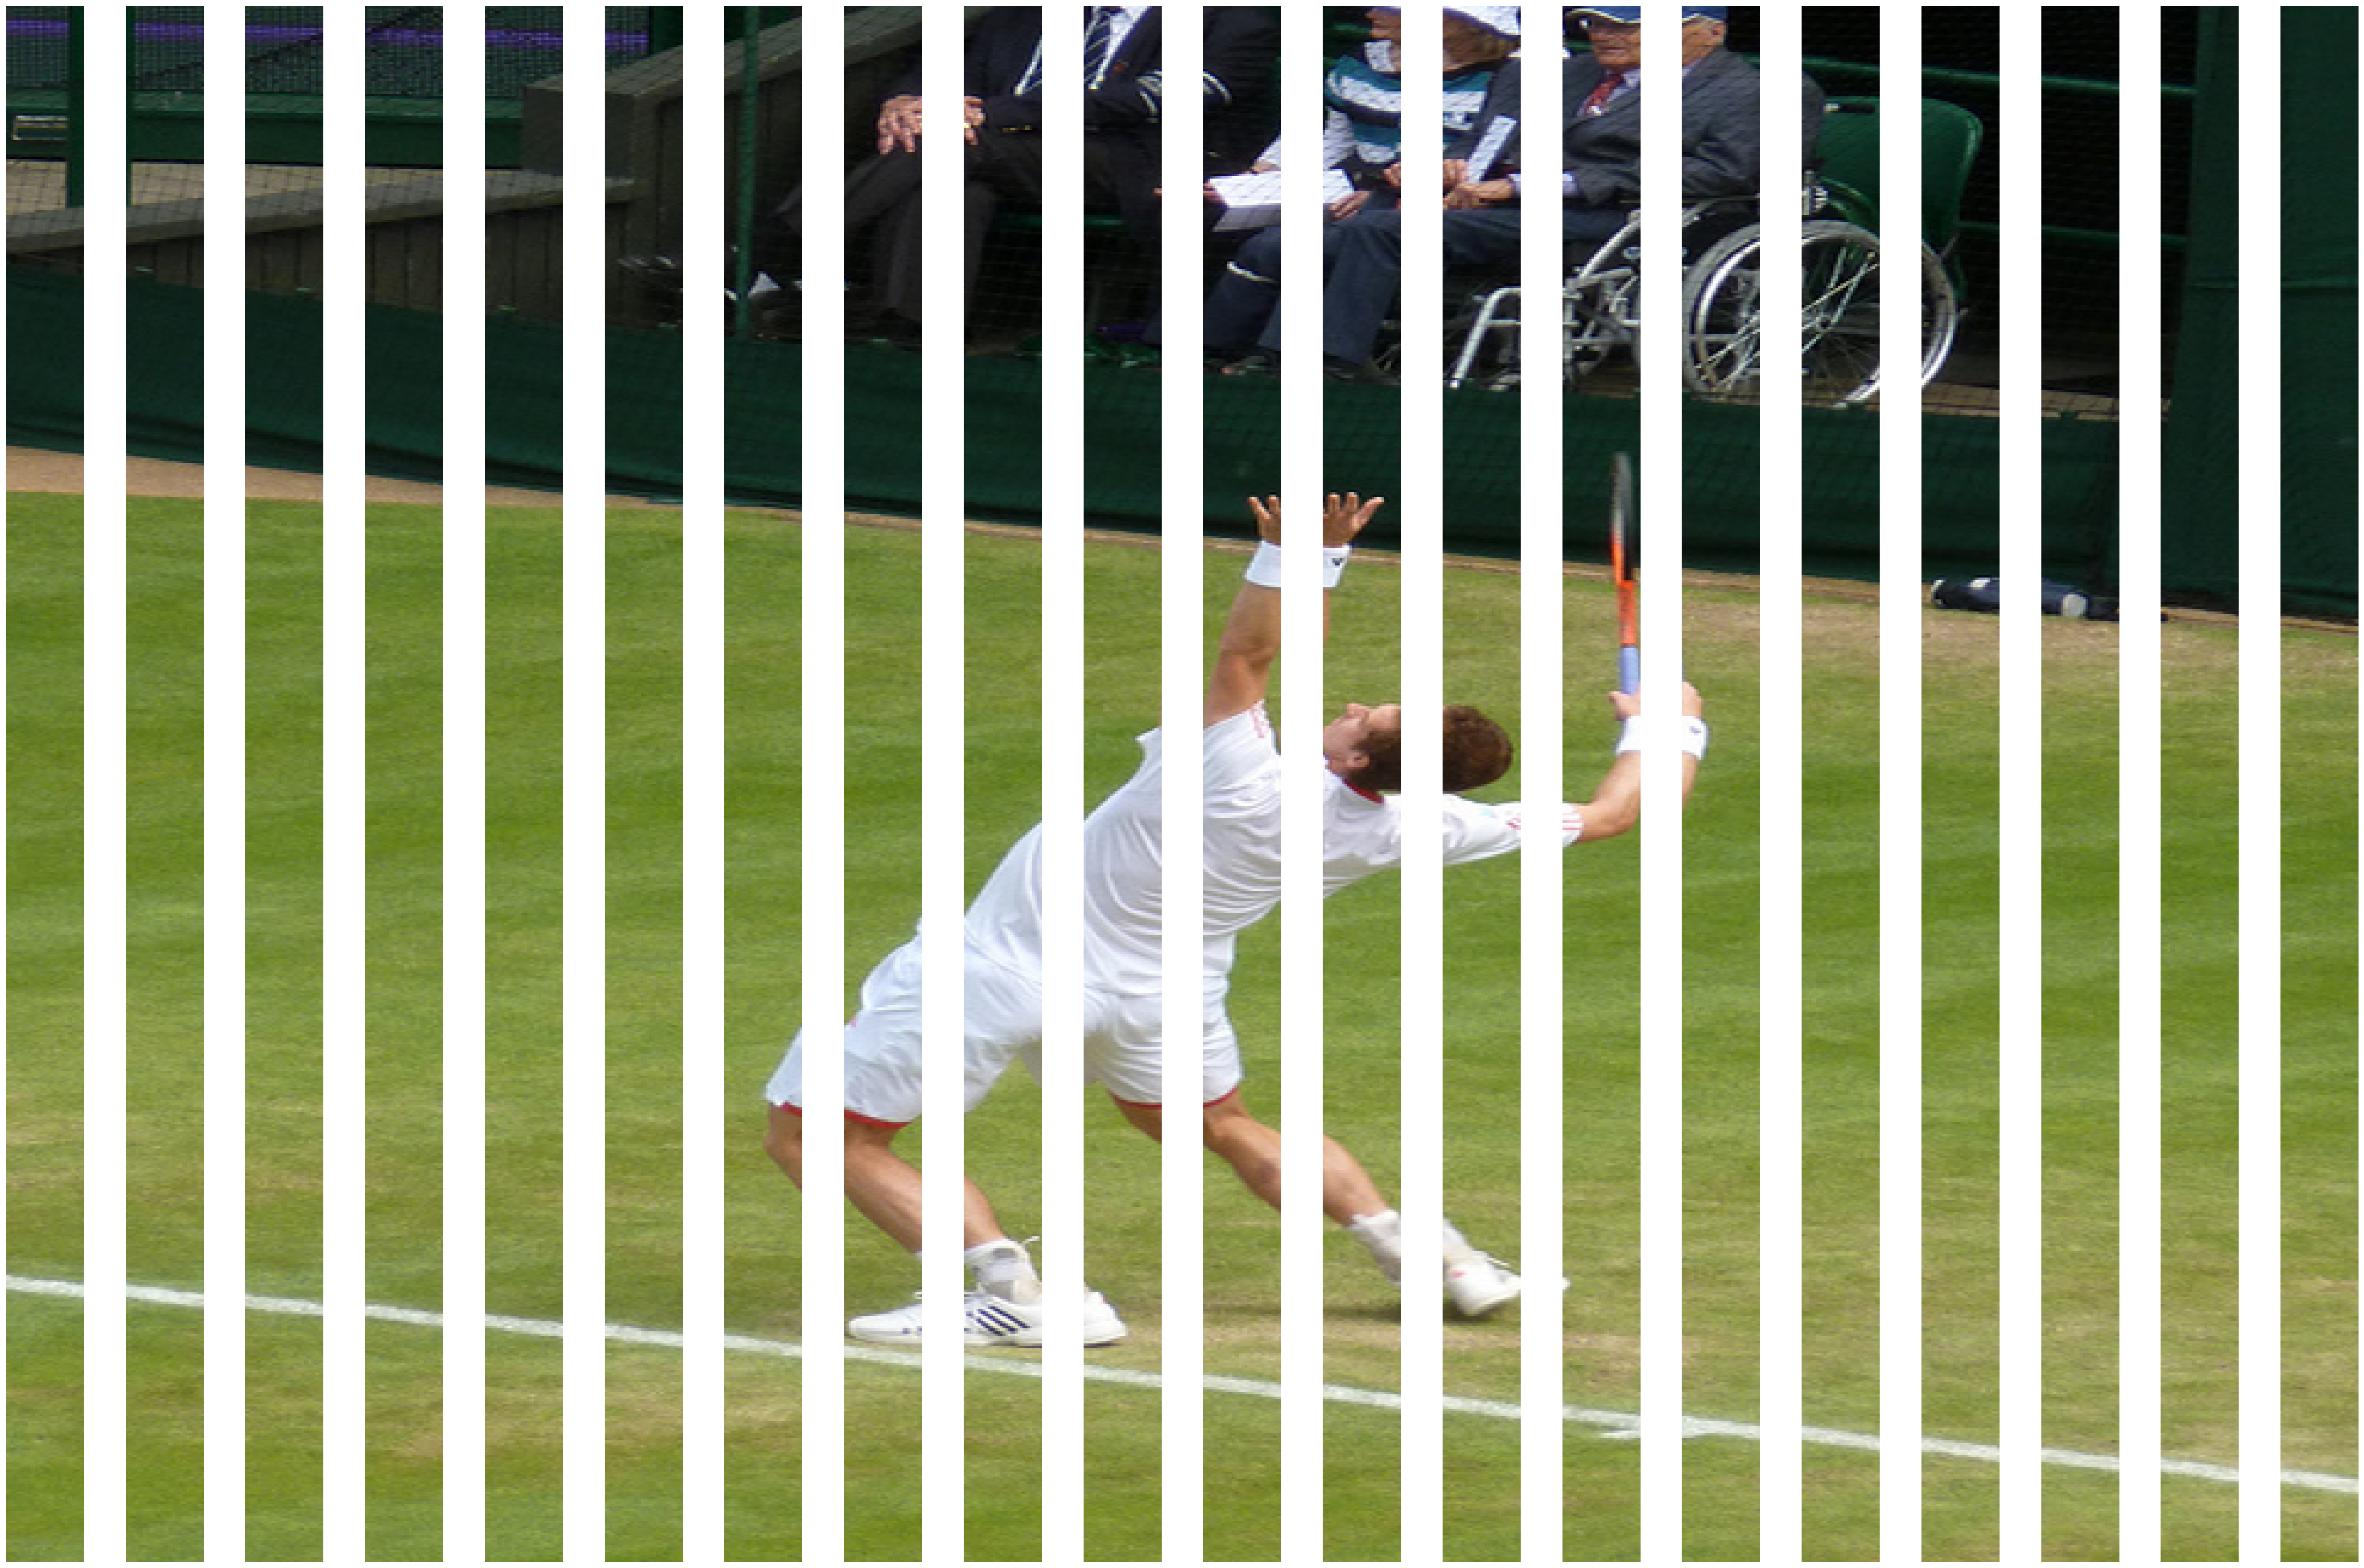

torch.Size([1, 20, 20, 3, 32, 32])
20


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

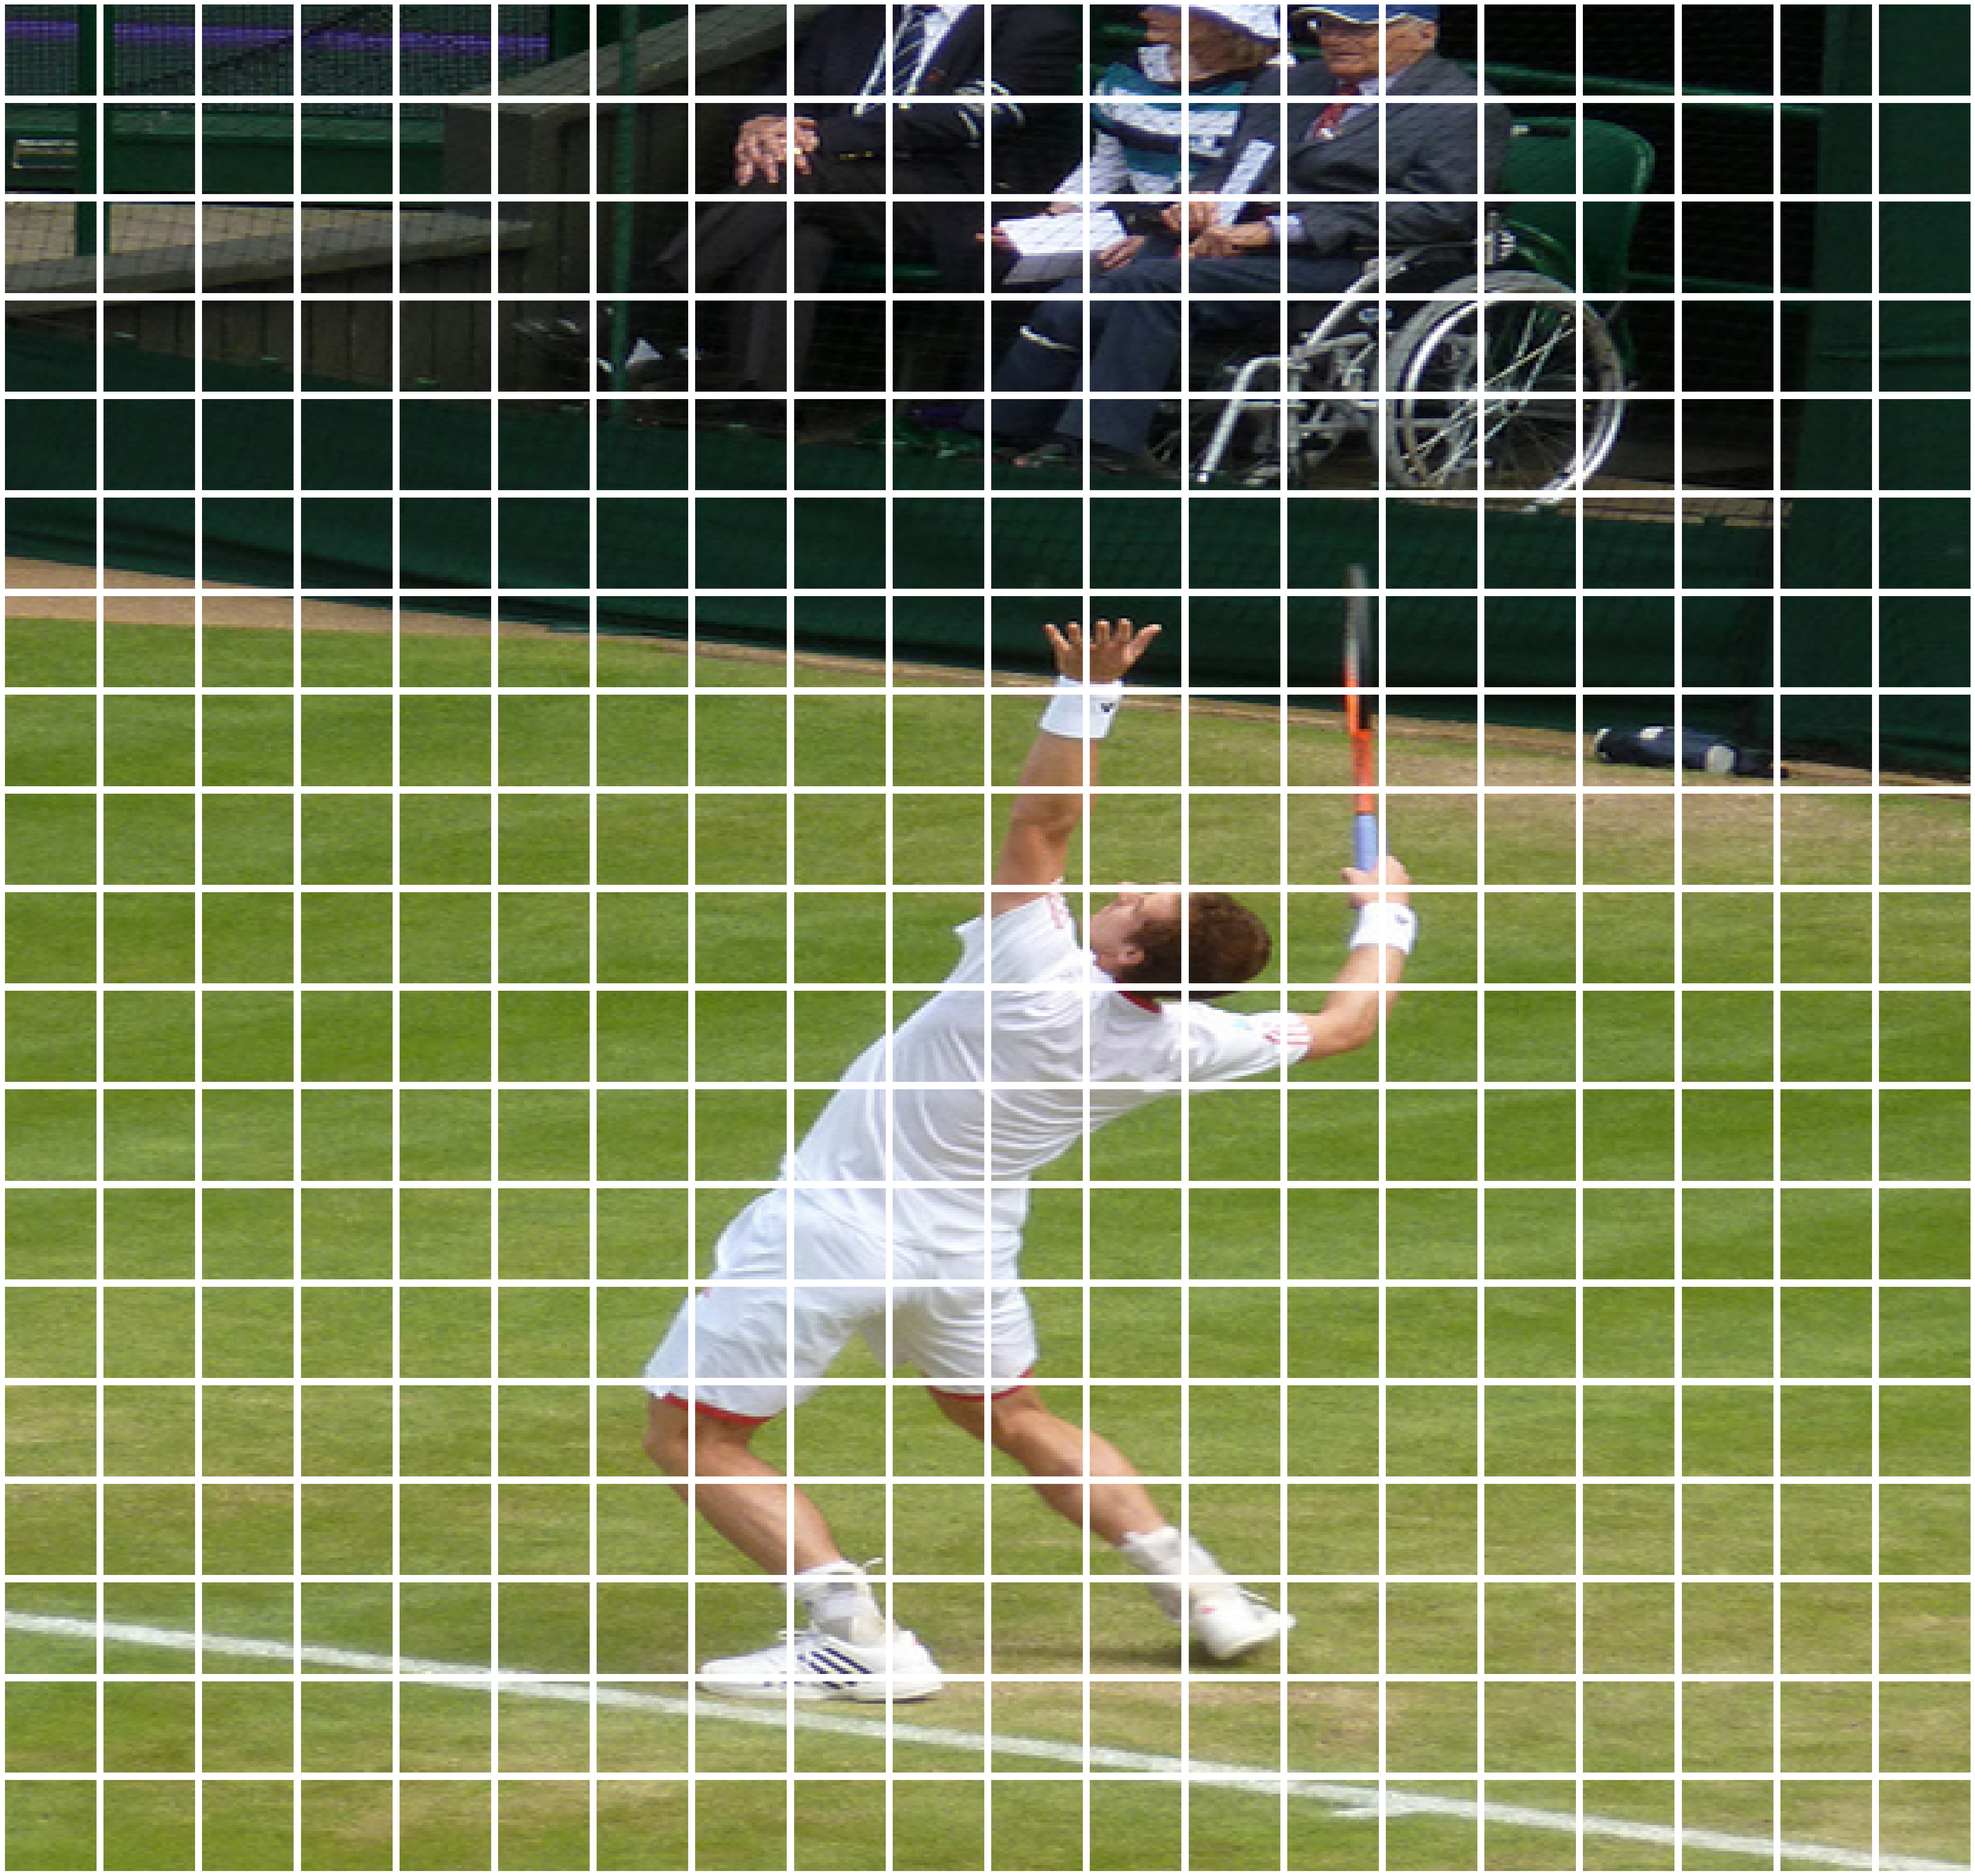

In [112]:
window_size = 32

windows  = image.unfold(0,3,3)
print(windows.shape)

windows = windows.unfold(1,window_size,window_size)
print(windows.shape)
x = windows.shape[1]

fig, ax = plt.subplots(1,x, figsize=(40, 26))

for x in range(x):
        ax[x].imshow(windows[0,x].permute(0,2,1))
        ax[x].axis('off')

fig.tight_layout()
plt.show()


windows = windows.unfold(2,window_size,window_size)
print(windows.shape)

y = windows.shape[2]
print(y)

fig, ax = plt.subplots(x, y, figsize=(2*y, 2*x))
for i in range(y):
        for j in range(x):
                ax[j,i].imshow(windows[0,i,j].permute(2,1,0))
                ax[j,i].axis('off')

fig.tight_layout()
plt.show()

In [113]:
stride = 1
kernel_size = 6
#text = 'a pair of white shoes'
#txt_embedding = text2embedding(text)
#text_input = clip.tokenize([text]).to(device)

heatmap = torch.zeros(windows.shape[1], windows.shape[2])
#Count how many time each window is used as a kernel, in order to normalize the results
# in the heatmap score
number_of_uses = torch.ones(windows.shape[1], windows.shape[2])

for i in range(0, windows.shape[1] - kernel_size + 1, stride):
        for j in range(0, windows.shape[2] - kernel_size + 1, stride):
                #Initialize the canvas as a random noise image 
                canvas = torch.zeros(window_size*kernel_size, window_size*kernel_size, 3)
                #print(canvas.shape)

                kernel = windows[0,i:i+kernel_size,j:j+kernel_size]
                #print(kernel.shape)
                #Add each window of the kernel to the canvas
                for k in range(kernel.shape[1]):
                        for l in range(kernel.shape[0]):
                                canvas[k*window_size:(k+1)*window_size, l*window_size:(l+1)*window_size] += kernel[k,l].permute(1,2,0)

                #plt.imshow(canvas)
                #plt.show()
                #print('original')
                #print(canvas.shape)
                canvas = canvas.permute(2,0,1)
                #print(canvas.shape)
                canvas_PIL = transforms.ToPILImage()(canvas)
                
                canvas_input = preprocess(canvas_PIL).unsqueeze(0).to(device)
                
                #Clip classification
                logits_per_image, logits_per_text = model(canvas_input, text_input)
                similarity = logits_per_image.to('cpu').item()
                        

                heatmap[i:i+kernel_size,j:j+kernel_size] += similarity
                number_of_uses[i:i+kernel_size,j:j+kernel_size] += 1
                print("kernel similarity:", similarity)  # prints: [[0.9927937  0.00421068 0.00299572]]

heatmap = heatmap / number_of_uses

kernel similarity: 16.774288177490234
kernel similarity: 16.799949645996094
kernel similarity: 16.96700668334961
kernel similarity: 16.559160232543945
kernel similarity: 16.11334228515625
kernel similarity: 16.205846786499023
kernel similarity: 15.289151191711426
kernel similarity: 14.219486236572266
kernel similarity: 14.69154167175293
kernel similarity: 14.686248779296875
kernel similarity: 14.63707160949707
kernel similarity: 13.421720504760742
kernel similarity: 12.967378616333008
kernel similarity: 11.672388076782227
kernel similarity: 12.314416885375977
kernel similarity: 16.581287384033203
kernel similarity: 16.848222732543945
kernel similarity: 16.566057205200195
kernel similarity: 16.009288787841797
kernel similarity: 16.11127281188965
kernel similarity: 15.625450134277344
kernel similarity: 14.516606330871582
kernel similarity: 14.359583854675293
kernel similarity: 15.549234390258789
kernel similarity: 17.517248153686523
kernel similarity: 16.586711883544922
kernel similarity

torch.Size([1, 20, 20, 3, 32, 32])
torch.Size([20, 20])
torch.Size([20, 20, 3, 32, 32])
torch.Size([32, 32, 20, 20, 3])
final torch.Size([32, 32, 3, 20, 20])
torch.Size([1, 20, 20, 3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

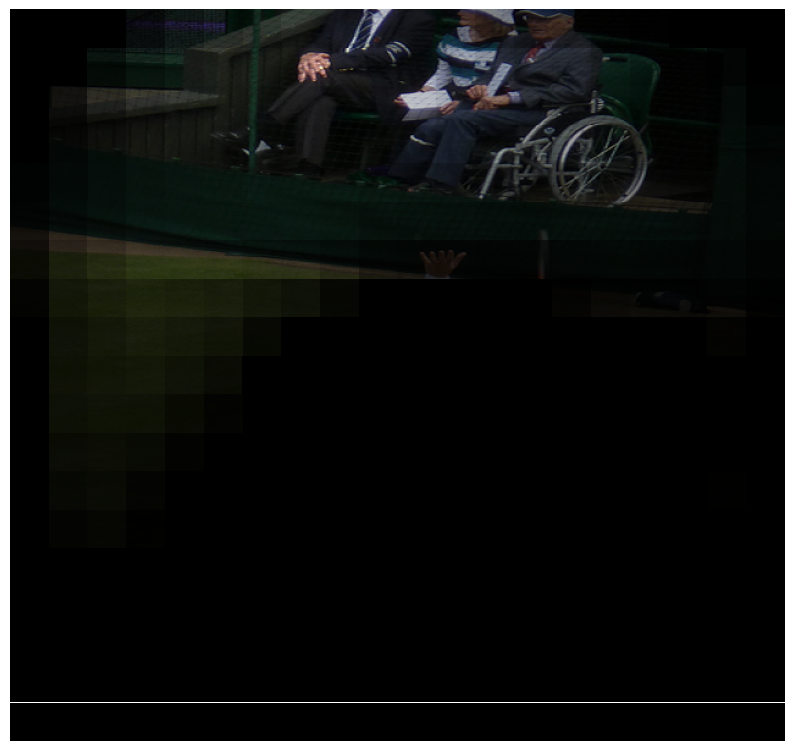

In [114]:
augmented_scores = heatmap.clone()
augmented_scores = np.clip(augmented_scores-augmented_scores.mean(), 0, np.inf)
#augmented_scores = np.clip(augmented_scores-augmented_scores.mean(), 0, np.inf)
#augmented_scores = np.clip(augmented_scores-augmented_scores.mean(), 0, np.inf)
augmented_scores = (augmented_scores - augmented_scores.min())/(augmented_scores.max() - augmented_scores.min())

#Make a copy of the tensor
hm = windows.clone()
#Need to match this two
print(hm.shape)
print(heatmap.shape)

hm = hm.squeeze(0)
print(hm.shape)
hm = hm.permute(3,4,0,1,2)
print(hm.shape)
#Put the number of channels at the end
hm = hm.permute(0,1,4,2,3)
print('final',hm.shape)
hm = hm*augmented_scores
#Reorder
#In order to print they have to be
print(windows.shape)
hm = hm.permute(3,4,2,0,1).unsqueeze(0)

#Print the results
fig, ax = plt.subplots(x, y, figsize=(0.5*y, 0.5*x))
for i in range(y):
        for j in range(x):
                ax[j,i].imshow(hm[0,i,j].permute(2,1,0))
                ax[j,i].axis('off')
                ax[j,i].set_aspect('equal')

fig.subplots_adjust(wspace=0.0,hspace=0.0)
plt.show()
